In [1]:
import mysql.connector as mysql
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
conn = mysql.connect(host='Localhost',user='root',passwd='Maxime29012018', database='foody')
if conn:
    print("Connection Successful!")
else:
    print("Connection Failed!")
cur = conn.cursor()

Connection Successful!


In [5]:
def sql_to_df(sql_query):

    # Use pandas to pass sql query using connection form SQLite3
    df = pd.read_sql(sql_query, conn)

    # Show the resulting DataFrame
    return df

In [202]:
# Request in Database 

query = '''SELECT codeCateg, nomCateg, descriptionn, ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande Co USING(noCom)
INNER JOIN produit P USING(refprod)
INNER JOIN categorie C USING(codecateg)
GROUP BY codecateg
'''

sql_to_df(query)

,codeCateg,nomCateg,descriptionn,Total
0,1,drinks,"Soft drinks, coffees, teas, beers, and ales",121095.0
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",51243.0
2,3,Desserts,"Desserts, candies, and sweet breads",78051.0
3,4,Dairy Products,Cheeses,103077.0
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",43327.0
5,6,Meat/Poultry,Prepared meats,63982.0
6,7,Produce,Dried fruit and bean curd,40428.0
7,8,Seafood,Seaweed and fish,47910.0


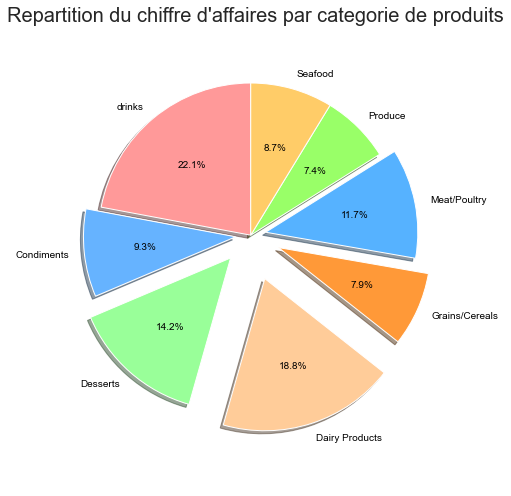

In [12]:
#Request in database with display data in pie-plot

query = '''SELECT codeCateg, nomCateg, ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande Co USING(noCom)
INNER JOIN produit P USING(refprod)
INNER JOIN categorie C USING(codecateg)
GROUP BY codecateg'''

labels = sql_to_df(query)['nomCateg']
sizes = sql_to_df(query)["Total"]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9938','#56b2ff','#99ff68','#ffcc68' ]
explode = (0, 0.1, 0.2, 0.3, 0.2, 0.1, 0, 0)  
fig1, ax1 = plt.subplots(figsize=(7,7))
plt.title("Repartition du chiffre d'affaires par categorie de produits", fontsize=20)
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
for text in texts:
    text.set_color('black') 
for autotext in autotexts:
    autotext.set_color('black') 

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [66]:
query = '''SELECT paysLiv, ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande USING (noCom)
GROUP BY paysLiv
ORDER BY 2 desc
LIMIT 10
'''

sql_to_df(query)

,paysLiv,Total
0,USA,103985.0
1,Germany,97850.0
2,Austria,55748.0
3,France,41685.0
4,Brazil,37108.0
5,Canada,34914.0
6,UK,26266.0
7,Venezuela,24887.0
8,Sweden,18397.0
9,Denmark,18355.0


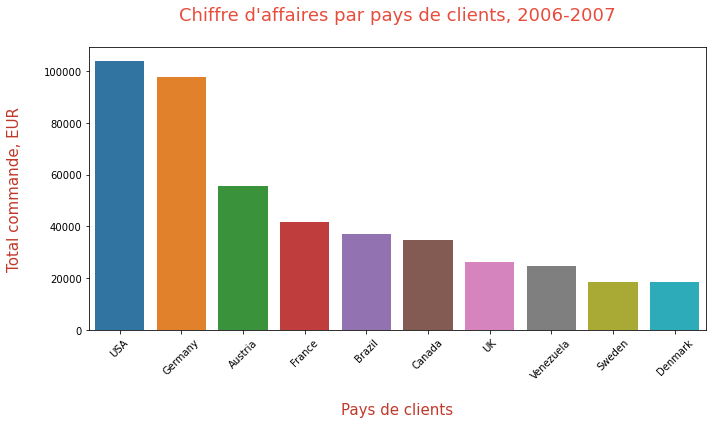

In [7]:
#Request in database with bar-plot Chiffre d'affaires par pays de clients

query = '''SELECT paysLiv, ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande USING (noCom)
GROUP BY paysLiv
ORDER BY 2 desc
LIMIT 10
'''

sql_to_df(query)
plt.figure(figsize=(10,6))
sns.barplot(x=sql_to_df(query)['paysLiv'], y=sql_to_df(query)['Total'])
plt.xlabel('\nPays de clients', fontsize=15, color='#c0392b')
plt.ylabel("Total commande, EUR\n", fontsize=15, color='#c0392b')
plt.title("Chiffre d'affaires par pays de clients, 2006-2007\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()

In [18]:
query = '''SELECT YEAR(datecom), QUARTER(datecom), paysLiv, ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande USING (noCom) WHERE YEAR(datecom) = 2006 AND QUARTER(datecom) = 3 
AND paysLiv IN ("USA", "Germany", "France", "Austria", "Brazil")  GROUP BY YEAR(datecom), paysLiv
UNION
SELECT YEAR(datecom), QUARTER(datecom), paysLiv, ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande USING (noCom) WHERE YEAR(datecom) = 2007 AND QUARTER(datecom) = 3 
AND paysLiv IN ("USA", "Germany", "France", "Austria", "Brazil")  GROUP BY YEAR(datecom), paysLiv
'''

sql_to_df(query)

,YEAR(datecom),QUARTER(datecom),paysLiv,Total
0,2006,3,France,4619.0
1,2006,3,Germany,18976.0
2,2006,3,Brazil,9094.0
3,2006,3,Austria,3489.0
4,2006,3,USA,14336.0
5,2007,3,Brazil,2640.0
6,2007,3,Germany,8496.0
7,2007,3,USA,26623.0
8,2007,3,Austria,5443.0
9,2007,3,France,723.0


Text(0, 0.5, 'Total commandes\n')

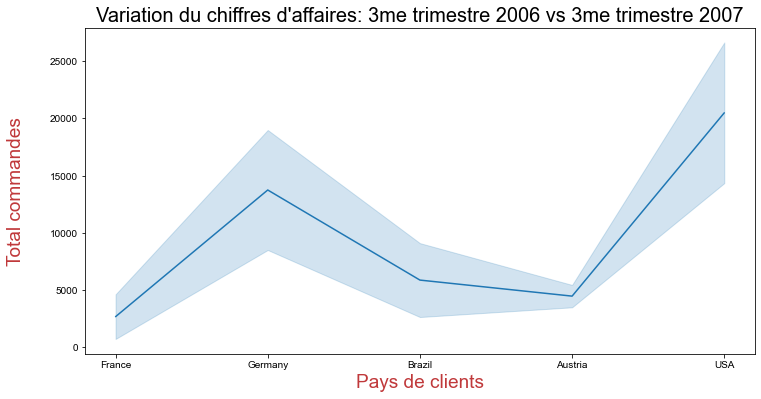

In [8]:
#Request in database Variation du chiffres d'affaires: 3me trimestre 2006 vs 3me trimestre 2007 with spagetty_bar

query = '''SELECT YEAR(datecom), QUARTER(datecom), paysLiv, ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande USING (noCom) WHERE YEAR(datecom) = 2006 AND QUARTER(datecom) = 3 
AND paysLiv IN ("USA", "Germany", "France", "Austria", "Brazil")  GROUP BY YEAR(datecom), paysLiv
UNION
SELECT YEAR(datecom), QUARTER(datecom), paysLiv, ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande USING (noCom) WHERE YEAR(datecom) = 2007 AND QUARTER(datecom) = 3 
AND paysLiv IN ("USA", "Germany", "France", "Austria", "Brazil")  GROUP BY YEAR(datecom), paysLiv'''
plt.subplots(figsize=(12,6))
sns.set_style("darkgrid")
sns.lineplot(data = sql_to_df(query), x = "paysLiv", y = "Total")
plt.title("Variation du chiffres d'affaires: 3me trimestre 2006 vs 3me trimestre 2007", fontsize=20)
plt.xlabel('Pays de clients', fontsize=19, color='#c0393b')
plt.ylabel("Total commandes\n", fontsize=19, color='#c0393b')


(array([-4000., -2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

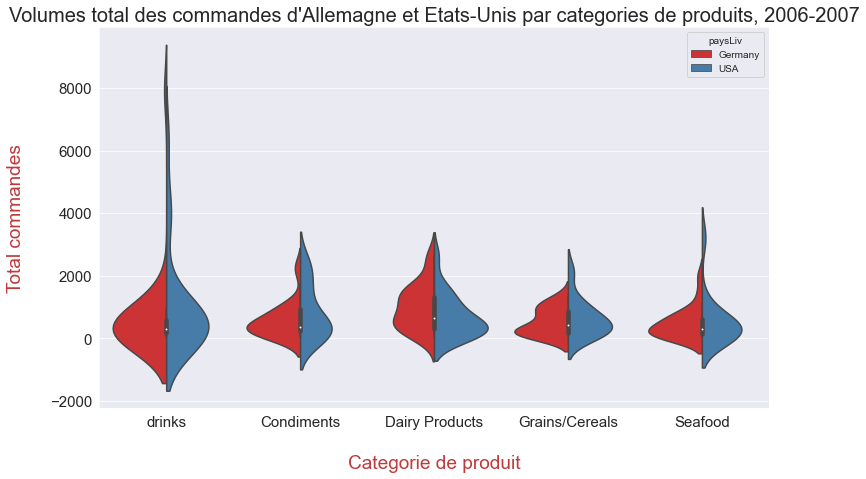

In [10]:
# Request experimental 

query = '''SELECT nomcateg, paysLiv, ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande USING (noCom)
INNER JOIN produit P USING(refprod)
INNER JOIN categorie C USING(codecateg) WHERE nomcateg IN ("drinks", "Condiments", "Grains/Cereals", "Dairy Products",
"Seafood")
AND paysLiv IN ("USA", "Germany")
GROUP BY codecateg, paysLiv, datecom '''
plt.subplots(figsize=(12,7))
sns.violinplot(x="nomcateg", y="Total", data=sql_to_df(query),hue='paysLiv',split=True,palette='Set1', )
plt.title("Volumes total des commandes d'Allemagne et Etats-Unis par categories de produits, 2006-2007", fontsize=20)
plt.xlabel('\nCategorie de produit', fontsize=19, color='#c0393b')
plt.ylabel("Total commandes\n", fontsize=19, color='#c0393b')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


In [230]:
query = '''SELECT nomcateg, paysLiv, ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande USING (noCom)
INNER JOIN produit P USING(refprod)
INNER JOIN categorie C USING(codecateg) WHERE nomcateg IN ("drinks", "Condiments", "Grains/Cereals", "Dairy Products",
"Seafood")
AND paysLiv IN ("USA", "Germany")
GROUP BY codecateg, datecom, paysLiv'''
sql_to_df(query)

,nomcateg,paysLiv,Total
0,drinks,Germany,518.0
1,drinks,USA,848.0
2,drinks,USA,288.0
3,drinks,Germany,184.0
4,drinks,Germany,576.0
...,...,...,...
180,Seafood,USA,288.0
181,Seafood,USA,286.0
182,Seafood,USA,398.0
183,Seafood,Germany,192.0


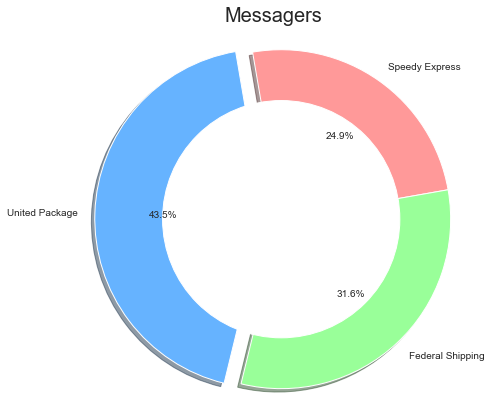

In [207]:
query = '''SELECT nomMess, ROUND(SUM(portt),0) as "Total livraison" FROM Commande
INNER JOIN messager 
ON Commande.noMess = messager.noMess
GROUP BY Commande.noMess'''
labels = sql_to_df(query)['nomMess']
sizes = sql_to_df(query)["Total livraison"]
explode = (0, 0.1, 0)  

fig1, ax1 = plt.subplots(figsize=(7,7))
plt.title('Messagers', fontsize=20)
colors = ['#ff9999','#66b3ff','#99ff99']
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=10)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [48]:
query = '''SELECT nomMess, ROUND(SUM(portt),0) as "Total livraison" FROM Commande
INNER JOIN messager 
ON Commande.noMess = messager.noMess
GROUP BY Commande.noMess'''

sql_to_df(query)

,nomMess,Total livraison
0,Speedy Express,16185.0
1,United Package,28245.0
2,Federal Shipping,20513.0


In [8]:
query = '''SELECT MONTHNAME(datecom), ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande USING (noCom) 
GROUP BY YEAR(datecom), MONTH(datecom)'''
sql_to_df(query)

,MONTHNAME(datecom),Total
0,July,27862.0
1,August,25485.0
2,September,26381.0
3,October,37516.0
4,November,45600.0
5,December,45240.0
6,January,61258.0
7,February,38484.0
8,March,38547.0
9,April,53033.0


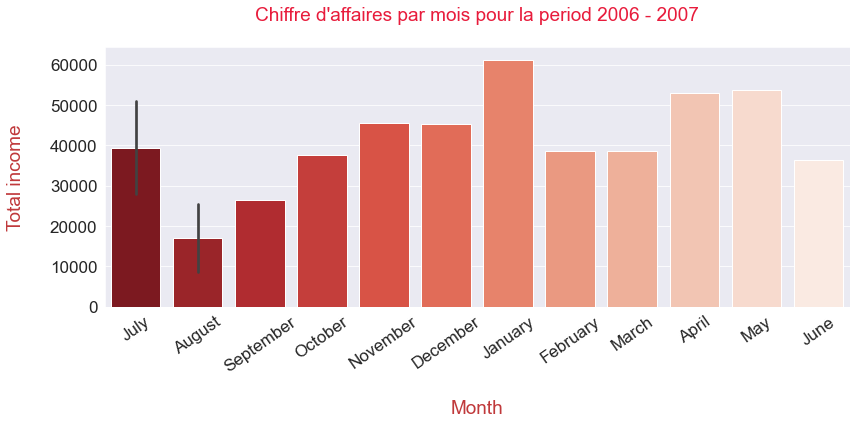

In [112]:
query = '''SELECT MONTHNAME(datecom), ROUND(SUM(D.PrixUnit * D.Qte * (1 - D.Remise))) AS "Total" 
FROM Detailcommande D 
INNER JOIN Commande USING (noCom) 
GROUP BY YEAR(datecom), MONTHNAME(datecom)'''
plt.figure(figsize=(12,6))
sns.barplot(x=sql_to_df(query)['MONTHNAME(datecom)'], y=sql_to_df(query)['Total'], palette = "Reds_r")
plt.xlabel('\nMonth', fontsize=19, color='#c0393b')
plt.ylabel("Total income\n", fontsize=19, color='#c0393b')
plt.title("Chiffre d'affaires par mois pour la period 2006 - 2007\n", fontsize=19, color='#e81c3c')
plt.xticks(fontsize=17, rotation=35)
plt.yticks(fontsize=17)
plt.tight_layout()